# Applications de méthodes de filtrage


Dans le but d'améliorer notre PSNR moyen final, nous voulons appliquer des filtres sur nos données d'entraînement. 

Pour chaque filtre, nous appliquons le filtre sur l'image d'entrée du `train set avec augmentation des données` et du `valisation set`, créant ainsi deux nouveaux fichiers `pkl` pour chaque filtre appliqué.


### Connection drive

Dans un premier temps, connectez-vous au drive pour accéder au dataset :

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importation des librairies pytorch

In [58]:
import torch
from torch import optim
from torch import Tensor
from torch import nn
from torch.nn import functional as F

In [57]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Filtre Médian, Gaussien et bilatéral

### Filtre médian 

Nous appliquons dans un premier temps le filtre médian qui est une technique de filtrage non linéaire, utilisé pour réduire le bruit impulsif.
Il remplace chaque pixel par la médiane des pixels voisins.

#### Train set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `train set` appliquant le filtre médian sur l'image d'entrée :


In [6]:
import numpy as np
import cv2
import torch

# chargement des images de notre train set avec data augmentation
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')

# conversion des tenseurs en tableaux NumPy
noisy_imgs_1 = np.transpose(noisy_imgs_1.numpy(), (0, 2, 3, 1))

# application du filtre médian avec une taille de noyau de 3x3 à chaque image
filtered_imgs_1 = np.zeros_like(noisy_imgs_1)

for i in range(len(noisy_imgs_1)):
    img = np.squeeze(noisy_imgs_1[i])
    filtered_imgs_1[i] = cv2.medianBlur(img, 3)

# conversion des tableaux NumPy en tenseurs PyTorch
filtered_imgs_1 = torch.from_numpy(np.transpose(filtered_imgs_1, (0, 3, 1, 2)))

# enregistrement des images d'entrées filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs_1, noisy_imgs_2), '/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_median.pkl')

**Visualisation de l'image filtrée par rapport à l'image originale**




Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs_1')

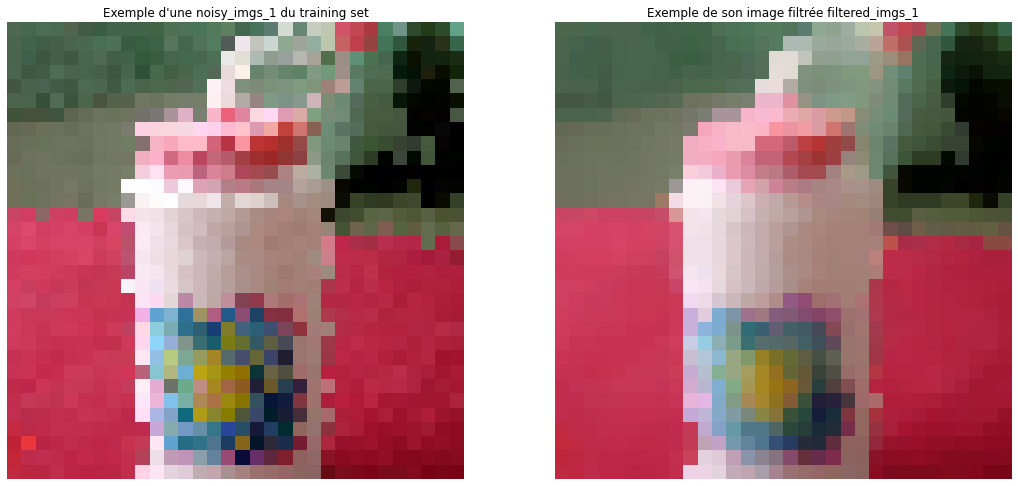

In [44]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')
filtered_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_median.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs_1 du training set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs_1")

#### Val set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `val set` appliquant le filtre médian sur l'image d'entrée :


In [ ]:
import numpy as np
import cv2
import torch

# chargement des images de notre val set 
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')

# conversion des tenseurs en tableaux NumPy
noisy_imgs = np.transpose(noisy_imgs.numpy(), (0, 2, 3, 1))

# application du filtre médian avec une taille de noyau de 3x3 à chaque image
filtered_imgs = np.zeros_like(noisy_imgs)

for i in range(len(noisy_imgs)):
    img = np.squeeze(noisy_imgs[i])
    filtered_imgs[i] = cv2.medianBlur(img, 3)

# conversion les tableaux NumPy en tenseurs PyTorch
filtered_imgs = torch.from_numpy(np.transpose(filtered_imgs, (0, 3, 1, 2)))

# enregistrement des images d'entrées filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs, clean_imgs), '/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_median.pkl')




**Visualisation de l'image filtrée par rapport à l'image originale**



Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs')

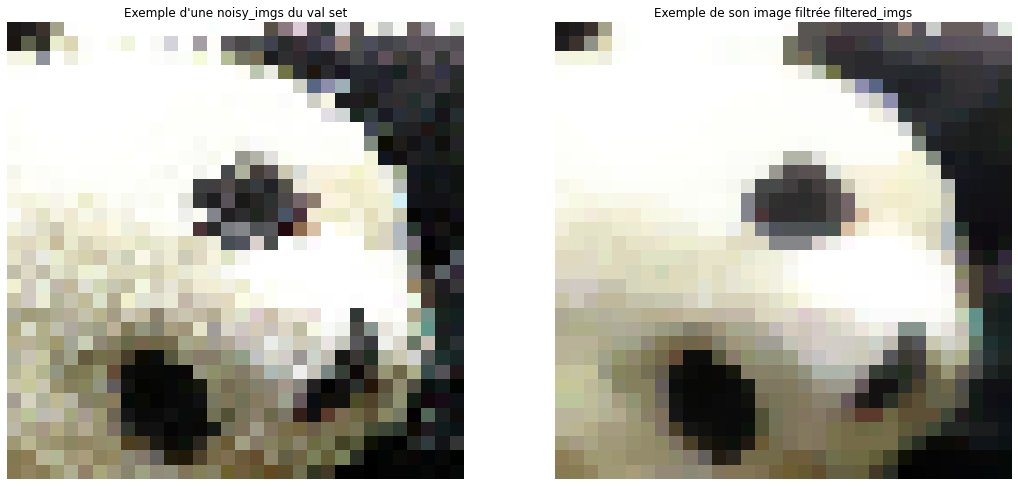

In [47]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')
filtered_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_median.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs du val set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs")

### Filtre Gaussien

Nous appliquons dans un second temps le filtre Gaussien qui est une technique de filtrage linéaire, souvent utilisé pour réduire le bruit dans les images.
Il remplace chaque pixel par la moyenne pondérée des pixels voisins, où les poids sont déterminés par une fonction Gaussienne.

#### Train set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `train set` appliquant le filtre Gaussien sur l'image d'entrée :


In [7]:
import numpy as np
import cv2
import torch

# chargement des images de notre train set avec data augmentation
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')

# conversion des tenseurs en tableaux NumPy
noisy_imgs_1 = np.transpose(noisy_imgs_1.numpy(), (0, 2, 3, 1))

# application du filtre Gaussien avec une taille de noyau de 3x3 à chaque image
filtered_imgs_1 = np.zeros_like(noisy_imgs_1)

for i in range(len(noisy_imgs_1)):
    img_1 = np.squeeze(noisy_imgs_1[i])
    filtered_imgs_1[i] = cv2.GaussianBlur(img_1, (3, 3), 0)

# conversion des tableaux NumPy en tenseurs PyTorch
filtered_imgs_1 = torch.from_numpy(np.transpose(filtered_imgs_1, (0, 3, 1, 2)))

# enregistrement des images d'entrées filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs_1, noisy_imgs_2), '/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_gaussian.pkl')

**Visualisation de l'image filtrée par rapport à l'image originale**

Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs_1')

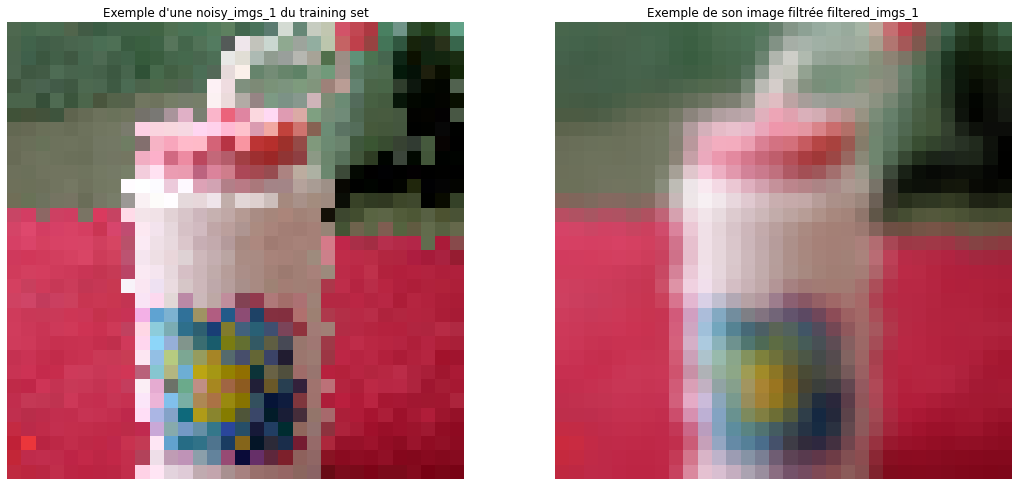

In [48]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')
filtered_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_gaussian.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs_1 du training set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs_1")

#### Val set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `val set` appliquant le filtre Gaussien sur l'image d'entrée :

In [9]:
import numpy as np
import cv2
import torch

# chargement des images de notre val set 
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')

# conversion les tenseurs en tableaux NumPy
noisy_imgs = np.transpose(noisy_imgs.numpy(), (0, 2, 3, 1))

# application du filtre Gaussien avec une taille de noyau de 3x3 à chaque image
filtered_imgs = np.zeros_like(noisy_imgs)

for i in range(len(noisy_imgs)):
    img_1 = np.squeeze(noisy_imgs[i])
    filtered_imgs[i] = cv2.GaussianBlur(img_1, (3, 3), 0)

# conversion des tableaux NumPy en tenseurs PyTorch
filtered_imgs = torch.from_numpy(np.transpose(filtered_imgs, (0, 3, 1, 2)))

# enregistrement des images d'entrées filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs, clean_imgs), '/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_gaussian.pkl')

**Visualisation de l'image filtrée par rapport à l'image originale**

Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs')

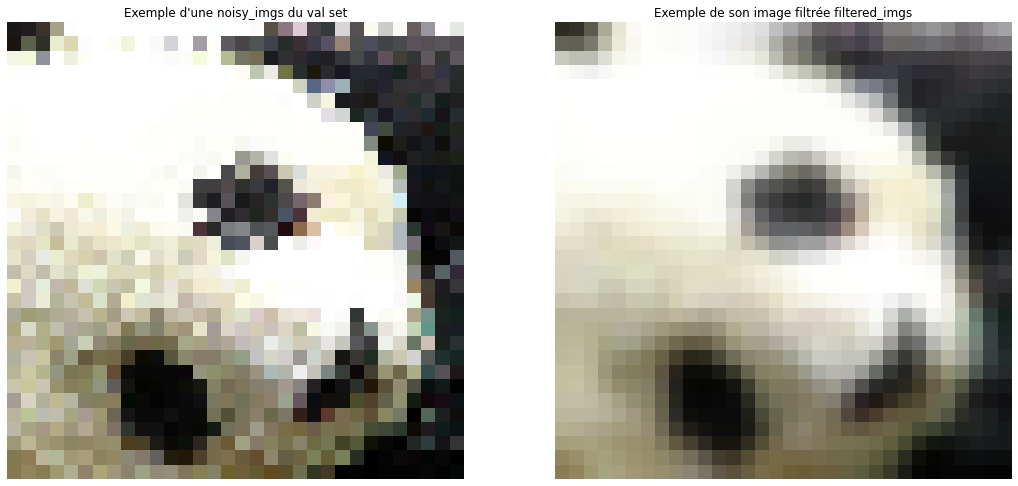

In [49]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')
filtered_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_gaussian.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs du val set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs")

### Filtre Bilatéral

Nous appliquons dans un troisième temps le filtre bilatéral qui est une technique de filtrage non linéaire, utilisé pour réduire le bruit tout en préservant les bords et les détails de l'image. 

Il remplace chaque pixel par la moyenne pondérée des pixels voisins, où les poids sont déterminés à la fois par une fonction Gaussienne spatiale et une fonction Gaussienne de la différence des couleurs.

#### Train set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `train set` appliquant le filtre bilatéral sur l'image d'entrée :


In [10]:
import numpy as np
import cv2
import torch

# chargement des images de notre train set avec data augmentation
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')

# conversion des tenseurs en tableaux NumPy
noisy_imgs_1 = np.transpose(noisy_imgs_1.numpy(), (0, 2, 3, 1))

# application du filtre bilatéral avec une taille de noyau de 5x5 à chaque image
filtered_imgs_1 = np.zeros_like(noisy_imgs_1)

for i in range(len(noisy_imgs_1)):
    img_1 = np.squeeze(noisy_imgs_1[i])
    filtered_imgs_1[i] = cv2.bilateralFilter(img_1, 5, 75, 75)

# conversion des tableaux NumPy en tenseurs PyTorch
filtered_imgs_1 = torch.from_numpy(np.transpose(filtered_imgs_1, (0, 3, 1, 2)))

# enregistrement des images d'entrées filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs_1, noisy_imgs_2), '/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_bilateral.pkl')


**Visualisation de l'image filtrée par rapport à l'image originale**


Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs_1')

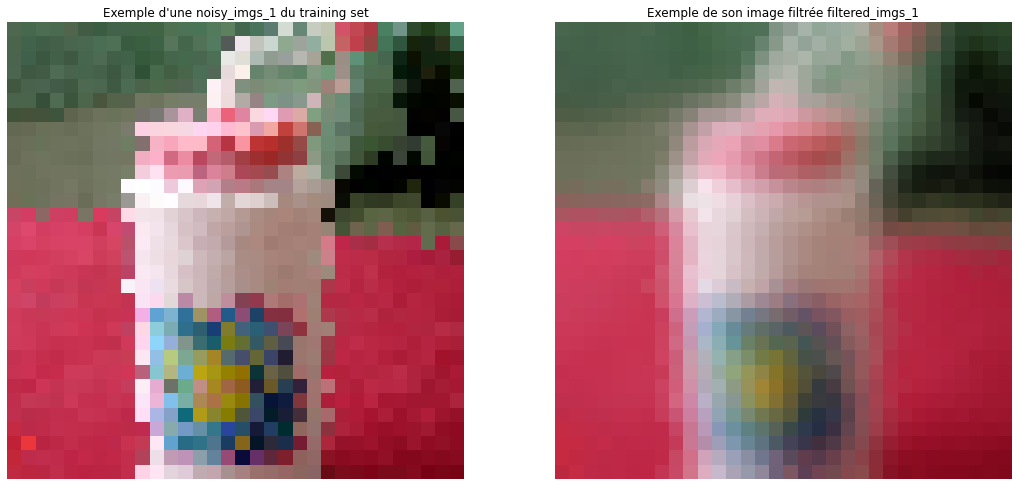

In [50]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')
filtered_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_bilateral.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs_1 du training set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs_1")

#### Val set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `val set` appliquant le filtre médian sur l'image d'entrée :

In [52]:
import numpy as np
import cv2
import torch

# chargement des images de notre val set 
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')

# conversion des tenseurs en tableaux NumPy
noisy_imgs = np.transpose(noisy_imgs.numpy(), (0, 2, 3, 1))

# application du filtre bilatéral avec une taille de noyau de 5x5 à chaque image
filtered_imgs = np.zeros_like(noisy_imgs)

for i in range(len(noisy_imgs)):
    img_1 = np.squeeze(noisy_imgs[i])
    filtered_imgs[i] = cv2.bilateralFilter(img_1, 5, 75, 75)

# conversion des tableaux NumPy en tenseurs PyTorch
filtered_imgs = torch.from_numpy(np.transpose(filtered_imgs, (0, 3, 1, 2)))

# enregistrement des images d'entrées filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs, clean_imgs), '/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_bilateral.pkl')

**Visualisation de l'image filtrée par rapport à l'image originale**

Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs')

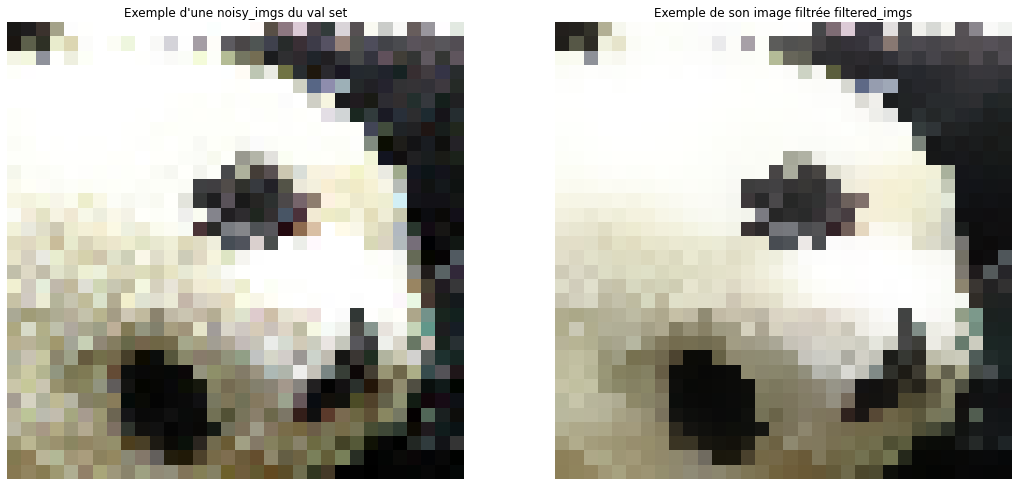

In [53]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')
filtered_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_bilateral.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs du val set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs")

### Conclusion

Nous remarquons que l'application de ces trois filtres n'améliorent pas après entraînement de notre réseau notre PSNR moyen final. 

En effet, ces trois filtres débruitent les images et nous perdons ainsi en détail. Le filtre ayant déjà effectué un débruitage sur nos images, notre réseau considère qu'il n'a plus rien à traiter.

Nous allons étudier d'autres méthodes de filtrage pour améliorer la qualité des images à basse résolution. En effet, nos images sont à très basse résolution, ce qui permet d'accéler nos entraînements mais cela empêche l'application de nombreux filtres.

## Filtres Unsharp masking et Unsharp masking & Médian 

### Filtre Unsharp masking

Nous appliquons dans un quatrième temps le filtre unsharp masking qui est une technique de filtrage, utilisé pour améliorer la netteté des images en renforcant les bords et les détails dans l'image tout en supprimant les bruits de faible amplitude.

#### Train set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `train set` appliquant le filtre unsharp masking sur l'image d'entrée :


In [27]:
import numpy as np
import cv2
import torch

# chargement des images de notre train set avec data augmentation
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')

# conversion des tenseurs en tableaux NumPy
noisy_imgs_1 = np.transpose(noisy_imgs_1.numpy(), (0, 2, 3, 1))

# application du filtre unsharp_masking avec un noyau gaussien de taille 5x5 et un facteur d'échelle de 1.5 à chaque image
filtered_imgs_1 = np.zeros_like(noisy_imgs_1)

for i in range(len(noisy_imgs_1)):
    img_1 = np.squeeze(noisy_imgs_1[i])
    blurred_img_1 = cv2.GaussianBlur(img_1, (5, 5), 0)
    filtered_imgs_1[i] = cv2.addWeighted(img_1, 1.5, blurred_img_1, -0.5, 0)

# conversion des tableaux NumPy en tenseurs PyTorch
filtered_imgs_1 = torch.from_numpy(np.transpose(filtered_imgs_1, (0, 3, 1, 2)))

# enregistrement des images filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs_1, noisy_imgs_2), '/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_unsharp_masking.pkl')


**Visualisation de l'image filtrée par rapport à l'image originale**


Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs_1')

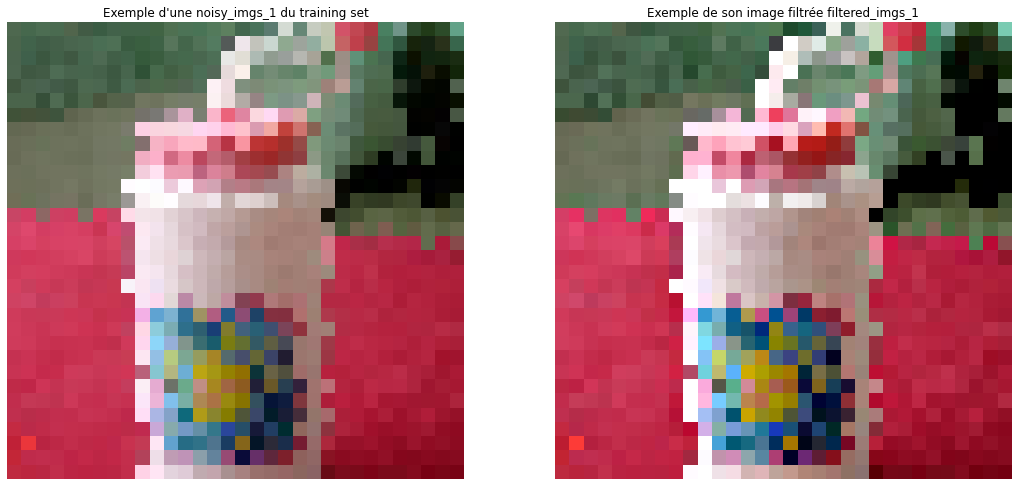

In [54]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')
filtered_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_unsharp_masking.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs_1 du training set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs_1")

#### Val set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `val set` appliquant le filtre unsharp masking sur l'image d'entrée :

In [30]:
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt

# chargement des images de notre val set 
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')

# conversion des tenseurs en tableaux NumPy
noisy_imgs = np.transpose(noisy_imgs.numpy(), (0, 2, 3, 1))

# application du filtre unsharp masking avec un noyau gaussien de taille 5x5 et un facteur d'échelle de 1.5 à chaque image bruitée
filtered_imgs = np.zeros_like(noisy_imgs)

for i in range(len(noisy_imgs)):
    img = np.squeeze(noisy_imgs[i])
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    filtered_imgs[i] = cv2.addWeighted(img, 1.5, blurred_img, -0.5, 0)

# conversion les tableaux NumPy en tenseurs PyTorch
filtered_imgs = torch.from_numpy(np.transpose(filtered_imgs, (0, 3, 1, 2)))

# enregistrement des images filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs, clean_imgs), '/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_unsharp_masking.pkl')

**Visualisation de l'image filtrée par rapport à l'image originale**

Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs')

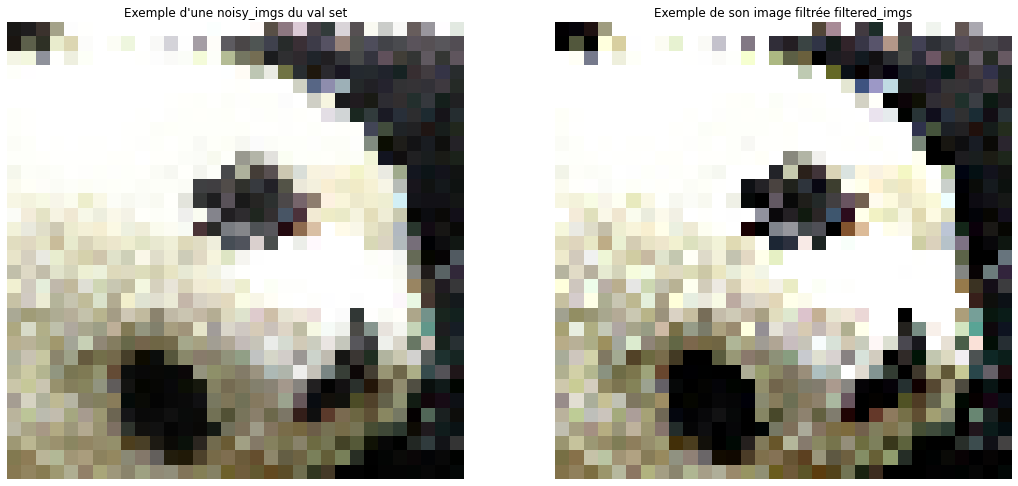

In [59]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')
filtered_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_unsharp_masking.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs du val set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs")

### Filtre Unsharp masking & médian

Nous appliquons dans un cinquième temps le filtre unsharp masking & médian qui combine le filtre unsharp masking et le filtre médian, vus auparavant. 

En combinant ces deux filtres, on peut obtenir une image qui est à la fois plus nette et moins bruyante, avec des bords et des contours mieux définis. Le filtre unsharp masking est appliqué en premier pour augmenter la netteté de l'image, puis le filtre median est appliqué en second pour éliminer les impulsions de bruit.

#### Train set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `train set` appliquant le filtre unsharp masking & médian sur l'image d'entrée :

In [ ]:
import numpy as np
import cv2
import torch

# chargement des images de notre train set avec data augmentation
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')

# conversion des tenseurs en tableaux NumPy
noisy_imgs_1 = np.transpose(noisy_imgs_1.numpy(), (0, 2, 3, 1))
noisy_imgs_2 = np.transpose(noisy_imgs_2.numpy(), (0, 2, 3, 1))

# application du filtre unsharp masking avec un noyau gaussien de taille 5x5 et un facteur d'échelle de 1.5 à chaque image, puis du filtre médian avec une taille de noyau de 3x3 à chaque image
filtered_imgs_1 = np.zeros_like(noisy_imgs_1)
filtered_imgs_2 = np.zeros_like(noisy_imgs_2)

for i in range(len(noisy_imgs_1)):
    img_1 = np.squeeze(noisy_imgs_1[i])
    img_2 = np.squeeze(noisy_imgs_2[i])
    blurred_img_1 = cv2.GaussianBlur(img_1, (5, 5), 0)
    blurred_img_2 = cv2.GaussianBlur(img_2, (5, 5), 0)
    filtered_img_1 = cv2.addWeighted(img_1, 1.5, blurred_img_1, -0.5, 0)
    filtered_img_2 = cv2.addWeighted(img_2, 1.5, blurred_img_2, -0.5, 0)
    filtered_imgs_1[i] = cv2.medianBlur(filtered_img_1, 3)
    filtered_imgs_2[i] = cv2.medianBlur(filtered_img_2, 3)

# conversion des tableaux NumPy en tenseurs PyTorch
filtered_imgs_1 = torch.from_numpy(np.transpose(filtered_imgs_1, (0, 3, 1, 2)))
filtered_imgs_2 = torch.from_numpy(np.transpose(filtered_imgs_2, (0, 3, 1, 2)))

# enregistrement des images filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs_1, filtered_imgs_2), '/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_unsharp_masking_median_blur.pkl')


**Visualisation de l'image filtrée par rapport à l'image originale**

Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs_1')

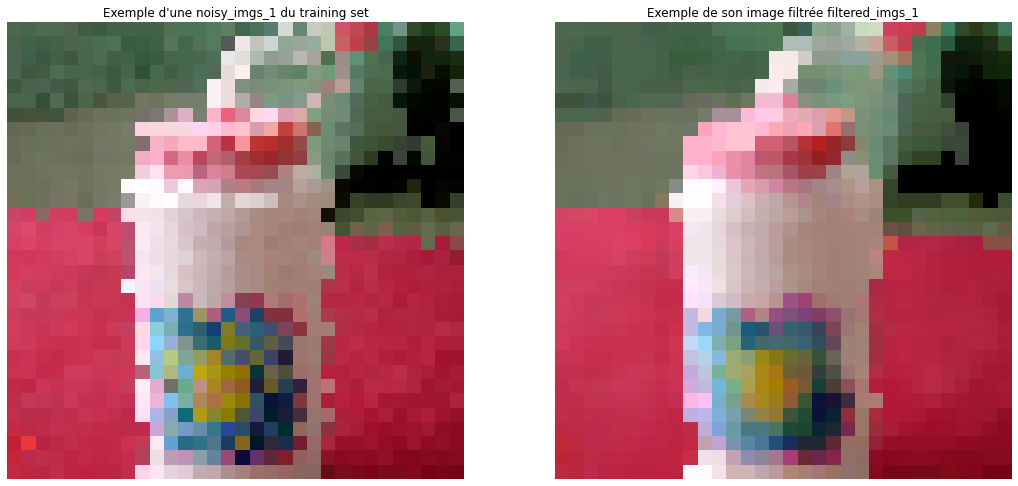

In [72]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')
filtered_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_unsharp_masking_median_blur.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs_1 du training set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs_1")

#### Val set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `val set` appliquant le filtre unsharp masking & médian sur l'image d'entrée :

In [113]:
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt

# chargement des images de notre val set 
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')

# conversion des tenseurs en tableaux NumPy
noisy_imgs = np.transpose(noisy_imgs.numpy(), (0, 2, 3, 1))

# application du filtre unsharp masking avec un noyau gaussien de taille 5x5 et un facteur d'échelle de 1.5 à chaque image bruitée, puis du filtre médian avec une taille de noyau de 3x3 à chaque image
filtered_noisy = np.zeros_like(noisy_imgs)

for i in range(len(noisy_imgs)):
    img = np.squeeze(noisy_imgs[i])
    if len(img.shape) == 2:
        img = np.expand_dims(img, -1)
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    filtered_img = cv2.addWeighted(img, 1.5, blurred_img, -0.5, 0)
    filtered_noisy[i] = cv2.medianBlur(filtered_img, 3)

# conversion les tableaux NumPy en tenseurs PyTorch
filtered_noisy = torch.from_numpy(np.transpose(filtered_noisy, (0, 3, 1, 2)))

# enregistrement des images filtrées dans un nouveau fichier pkl
torch.save((filtered_noisy, clean_imgs), '/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_unsharp_masking_median_blur.pkl')

**Visualisation de l'image filtrée par rapport à l'image originale**

Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs')

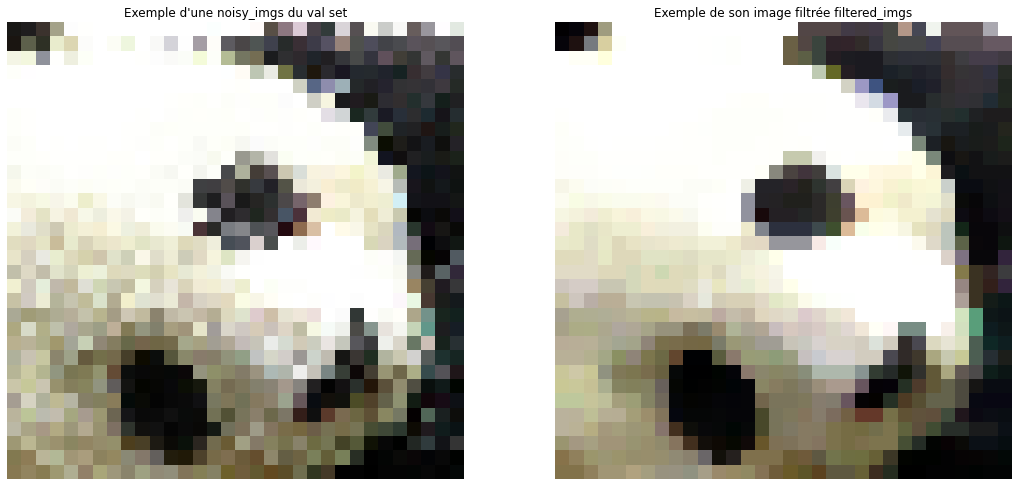

In [114]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')
filtered_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_unsharp_masking_median_blur.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs du val set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs")

### Conclusion

L'application de ces deux filtres permettent d'améliorer la qualité de nos images mais n'améliorent toujours pas notre PSNR moyen final. Nous perdons trop en détail.

Nous allons appliquer le filtre de Nagao, qui est souvent utilisé pour améliorer la netteté des images à faible résolution comme des images médicales, satellites et de microscope. Ce filtre se rapproche ainsi plus de notre dataset.




## Filtre de Nagao


Nous appliquons dans un sixième temps le filtre de Nagao, qui est une méthode de filtrage non linéaire, utilisé pour améliorer la qualité des images à faible résolution en réduisant le bruit. 

Il utilise des patchs de pixels pour calculer des coefficients de corrélation qui sont utilisés pour filtrer les pixels voisins.


#### Train set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `train set` appliquant le filtre de Nagao sur l'image d'entrée :

In [76]:
import numpy as np
import cv2
import torch

# chargement des images de notre train set avec data augmentation
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')

# conversion des tenseurs en tableaux NumPy
noisy_imgs_1 = np.transpose(noisy_imgs_1.numpy(), (0, 2, 3, 1))

# application du filtre de Nagao avec une taille de fenêtre de 7x7 à chaque image
filtered_imgs_1 = np.zeros_like(noisy_imgs_1)

for i in range(len(noisy_imgs_1)):
    img_1 = np.squeeze(noisy_imgs_1[i])
    kernel = np.array([[0, 0, 0, 1, 1, 1, 0, 0, 0],
                       [0, 0, 1, 1, 1, 1, 1, 0, 0],
                       [0, 1, 1, 1, 1, 1, 1, 1, 0],
                       [1, 1, 1, 1, 1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1, 1, 1, 1, 1],
                       [0, 1, 1, 1, 1, 1, 1, 1, 0],
                       [0, 0, 1, 1, 1, 1, 1, 0, 0],
                       [0, 0, 0, 1, 1, 1, 0, 0, 0]])
    kernel = kernel / np.sum(kernel)
    filtered_imgs_1[i] = cv2.filter2D(img_1, -1, kernel)

# conversion des tableaux NumPy en tenseurs PyTorch
filtered_imgs_1 = torch.from_numpy(np.transpose(filtered_imgs_1, (0, 3, 1, 2)))

# enregistrement des images filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs_1, noisy_imgs_2), '/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_nagao.pkl')


**Visualisation de l'image filtrée par rapport à l'image originale**

Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs_1')

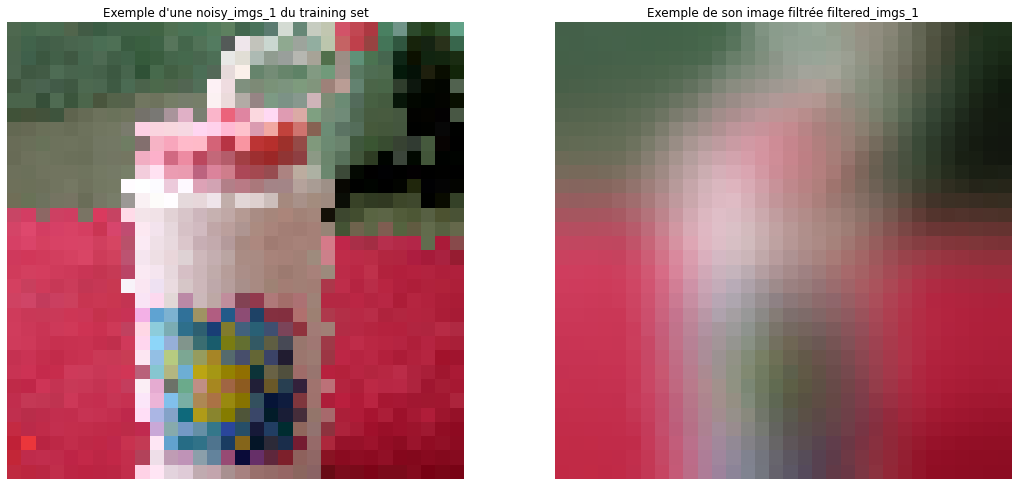

In [78]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data.pkl')
filtered_imgs_1, noisy_imgs_2 = torch.load('/content/drive/MyDrive/ComputerVision/dataset/augmented_train_data_filtered_nagao.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs_1 du training set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs_1[7].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs_1")

#### Val set

---

Exécutez la cellule suivante pour créer un nouveau fichier `pkl` pour le `val set` appliquant le filtre de Nagao sur l'image d'entrée :

In [ ]:
import numpy as np
import cv2
import torch

# chargement des images du val set
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')
noisy_imgs = np.transpose(noisy_imgs.numpy(), (0, 2, 3, 1))

# application du filtre de Nagao avec une taille de fenêtre de 7x7 à chaque image bruyante
filtered_imgs = np.zeros_like(noisy_imgs)

for i in range(len(noisy_imgs)):
    img = np.squeeze(noisy_imgs[i])
    kernel = np.array([[0, 0, 0, 1, 1, 1, 0, 0, 0],
                       [0, 0, 1, 1, 1, 1, 1, 0, 0],
                       [0, 1, 1, 1, 1, 1, 1, 1, 0],
                       [1, 1, 1, 1, 1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1, 1, 1, 1, 1],
                       [1, 1, 1, 1, 1, 1, 1, 1, 1],
                       [0, 1, 1, 1, 1, 1, 1, 1, 0],
                       [0, 0, 1, 1, 1, 1, 1, 0, 0],
                       [0, 0, 0, 1, 1, 1, 0, 0, 0]])
    kernel = kernel / np.sum(kernel)
    filtered_imgs[i] = cv2.filter2D(img, -1, kernel)

# conversion des tableaux NumPy en tenseurs PyTorch
filtered_imgs = torch.from_numpy(np.transpose(filtered_imgs, (0, 3, 1, 2)))

# enregistrement des images filtrées dans un nouveau fichier pkl
torch.save((filtered_imgs, clean_imgs), '/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_nagao.pkl')

**Visualisation de l'image filtrée par rapport à l'image originale**

Text(0.5, 1.0, 'Exemple de son image filtrée filtered_imgs')

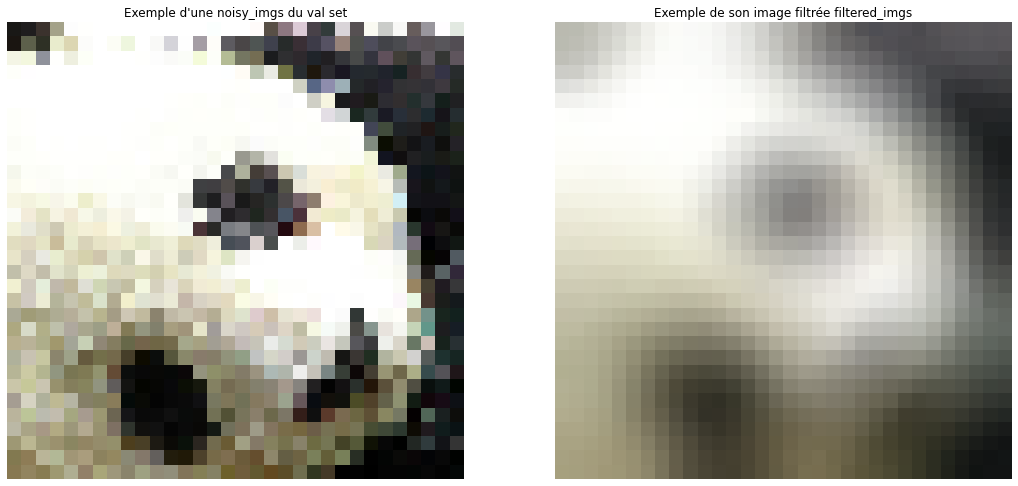

In [79]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data.pkl')
filtered_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_nagao.pkl')

# création d'une figure
fig = plt.figure(figsize=(18, 9))
    
# définissons les valeurs pour les variables de lignes et de colonnes
rows = 1
columns = 2

# ajout d'un subplot
fig.add_subplot(rows, columns, 1)

# visualisation de l'image initiale bruitée
plt.imshow(noisy_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple d'une noisy_imgs du val set")

# ajout d'un subplot
fig.add_subplot(rows, columns, 2)
    
# visualisation de son image initiale filtrée
plt.imshow(filtered_imgs[13].cpu().permute(1,2,0))
plt.axis('off')
plt.title("Exemple de son image filtrée filtered_imgs")

### Conclusion

L'application du filtre de Nagao n'améliore pas non plus notre PSNR moyen final car nous perdons trop en détail

## Conclusion & Benchmark

### Résultats de l'application des filtres sur notre réseau

Voici les différents résultats du PSNR obtenu avec l'application des filtres :

|   Filtre appliqué sur le dataset du training   |   PSNR Moyen en dB |    
|---    |:-:    |
|   Médian  |    24.08  |   
|  Gaussien    |   25.24 |    
|    Bilatéral |    12.42  |   
|    **Unsharp masking** |  **25.43**   |   
|    Unsharp masking & Médian |   23.02   |   
|    Nagao |    23.04  |  



Nous remarquons que l'application des filtres sur nos données d'entraînement **n'améliorent pas notre PSNR moyen final**, le diminuent au contraire. En effet, nous obtenons initialement sans filtre un PSNR de 25.50 dB. 

Ceci peut s'expliquer par le fait que **notre réseau U-Net se comportant comme un filtre de débruitage**, l'application d'un filtre avant l'entraînement de notre réseau n'augmente en rien notre PSNR moyen final. Le filtre ayant déjà effectué un débruitage sur nos images, notre réseau considère qu'il n'a plus rien à traiter. 


### Benchmark



---
Il serait donc intéressant, en contrepartie, de comparer l'efficacité de notre réseau U-Net à l'application des filtres sur nos images sans entraînement du modèle, à travers la métrique du PSNR. 

#### Filtre Médian

Chargez les images du `validation set` :

In [85]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs , clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_median.pkl')

# normalisez les images
noisy_imgs = noisy_imgs/255
clean_imgs = clean_imgs/255



---


Calculons le PSNR avec l'application du filtre sur l'image d'entrée et comparons notre PSNR à notre PSNR obtenu avec notre réseau U-Net :

In [88]:
def psnr(denoised , ground_truth):
# Peak Signal to Noise Ratio : denoised and ground_truth have values between 0 and 1
  mse = torch.mean((denoised - ground_truth) ** 2)
  return -10 * torch.log10(mse + 10**-8)

sum = 0
nb_img = noisy_imgs.size(0)
psnr_list = []

for i in range(nb_img):
  psnr_list.append(psnr(noisy_imgs[i].cpu(), clean_imgs[i].cpu()).item())
    
for j in range(nb_img):
  sum = sum + psnr_list[j]

mean_psnr = sum/nb_img

print("PSNR mean : " + str(mean_psnr) + " dB")

PSNR mean : 22.735110154151915 dB


Nous obtenons un PSNR moyen de 22.74 dB avec l'application du filtre médian contre 25.50 après l'entraînement de notre U-Net.

En conséquence, nous obtenons un PSNR plus élevé après entraînement de notre modèle, cela signifie que notre réseau débruite plus efficacement les images que le filtre.

#### Filtre Gaussien

Chargez les images du `validation set` :

In [89]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs , clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_gaussian.pkl')

# normalisez les images
noisy_imgs = noisy_imgs/255
clean_imgs = clean_imgs/255



---


Calculons le PSNR avec l'application du filtre sur l'image d'entrée et comparons notre PSNR à notre PSNR obtenu avec notre réseau U-Net :

In [90]:
def psnr(denoised , ground_truth):
# Peak Signal to Noise Ratio : denoised and ground_truth have values between 0 and 1
  mse = torch.mean((denoised - ground_truth) ** 2)
  return -10 * torch.log10(mse + 10**-8)

sum = 0
nb_img = noisy_imgs.size(0)
psnr_list = []

for i in range(nb_img):
  psnr_list.append(psnr(noisy_imgs[i].cpu(), clean_imgs[i].cpu()).item())
    
for j in range(nb_img):
  sum = sum + psnr_list[j]

mean_psnr = sum/nb_img

print("PSNR mean : " + str(mean_psnr) + " dB")

PSNR mean : 24.298583446502686 dB


Nous obtenons un PSNR moyen de 24.30 dB avec l'application du filtre gaussien contre 25.50 après l'entraînement de notre U-Net.

En conséquence, nous obtenons un PSNR plus élevé après entraînement de notre modèle, cela signifie que notre réseau débruite plus efficacement les images que le filtre.

#### Filtre Bilatéral

Chargez les images du `validation set` :

In [91]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs , clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_bilateral.pkl')

# normalisez les images
noisy_imgs = noisy_imgs/255
clean_imgs = clean_imgs/255



---


Calculons le PSNR avec l'application du filtre sur l'image d'entrée et comparons notre PSNR à notre PSNR obtenu avec notre réseau U-Net :

In [92]:
def psnr(denoised , ground_truth):
# Peak Signal to Noise Ratio : denoised and ground_truth have values between 0 and 1
  mse = torch.mean((denoised - ground_truth) ** 2)
  return -10 * torch.log10(mse + 10**-8)

sum = 0
nb_img = noisy_imgs.size(0)
psnr_list = []

for i in range(nb_img):
  psnr_list.append(psnr(noisy_imgs[i].cpu(), clean_imgs[i].cpu()).item())
    
for j in range(nb_img):
  sum = sum + psnr_list[j]

mean_psnr = sum/nb_img

print("PSNR mean : " + str(mean_psnr) + " dB")

PSNR mean : 21.779741938591002 dB


Nous obtenons un PSNR moyen de 21.78 dB avec l'application du filtre bilatéral contre 25.50 après l'entraînement de notre U-Net.

En conséquence, nous obtenons un PSNR plus élevé après entraînement de notre modèle, cela signifie que notre réseau débruite plus efficacement les images que le filtre.

#### Filtre Unsharp masking

Chargez les images du `validation set` :

In [94]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs , clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_unsharp_masking.pkl')

# normalisez les images
noisy_imgs = noisy_imgs/255
clean_imgs = clean_imgs/255



---


Calculons le PSNR avec l'application du filtre sur l'image d'entrée et comparons notre PSNR à notre PSNR obtenu avec notre réseau U-Net :

In [95]:
def psnr(denoised , ground_truth):
# Peak Signal to Noise Ratio : denoised and ground_truth have values between 0 and 1
  mse = torch.mean((denoised - ground_truth) ** 2)
  return -10 * torch.log10(mse + 10**-8)

sum = 0
nb_img = noisy_imgs.size(0)
psnr_list = []

for i in range(nb_img):
  psnr_list.append(psnr(noisy_imgs[i].cpu(), clean_imgs[i].cpu()).item())
    
for j in range(nb_img):
  sum = sum + psnr_list[j]

mean_psnr = sum/nb_img

print("PSNR mean : " + str(mean_psnr) + " dB")

PSNR mean : 17.864449507713317 dB


Nous obtenons un PSNR moyen de 17.87 dB avec l'application du filtre unsharp masking contre 25.50 après l'entraînement de notre U-Net.

En conséquence, nous obtenons un PSNR plus élevé après entraînement de notre modèle, cela signifie que notre réseau débruite plus efficacement les images que le filtre.

#### Filtre Unsharp masking & Médian

Chargez les images du `validation set` :

In [115]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs, clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_unsharp_masking_median_blur.pkl')

# normalisez les images
noisy_imgs = noisy_imgs/255
clean_imgs = clean_imgs/255



---


Calculons le PSNR avec l'application du filtre sur l'image d'entrée et comparons notre PSNR à notre PSNR obtenu avec notre réseau U-Net :

In [116]:
def psnr(denoised , ground_truth):
# Peak Signal to Noise Ratio : denoised and ground_truth have values between 0 and 1
  mse = torch.mean((denoised - ground_truth) ** 2)
  return -10 * torch.log10(mse + 10**-8)

sum = 0
nb_img = noisy_imgs.size(0)
psnr_list = []

for i in range(nb_img):
  psnr_list.append(psnr(noisy_imgs[i].cpu(), clean_imgs[i].cpu()).item())

    
for j in range(nb_img):
  sum = sum + psnr_list[j]

mean_psnr = sum/nb_img

print("PSNR mean : " + str(mean_psnr) + " dB")

PSNR mean : 21.420751648902893 dB


Nous obtenons un PSNR moyen de 21.42 dB avec l'application du filtre unsharp masking & médian contre 25.50 après l'entraînement de notre U-Net.

En conséquence, nous obtenons un PSNR plus élevé après entraînement de notre modèle, cela signifie que notre réseau débruite plus efficacement les images que le filtre.

#### Filtre de Nagao

Chargez les images du `validation set` :

In [105]:
import torch
import matplotlib.pyplot as plt

# chargement des images à partir des fichiers correspondants
noisy_imgs , clean_imgs = torch.load('/content/drive/MyDrive/ComputerVision/dataset/val_data_filtered_nagao.pkl')

# normalisez les images
noisy_imgs = noisy_imgs/255
clean_imgs = clean_imgs/255



---


Calculons le PSNR avec l'application du filtre sur l'image d'entrée et comparons notre PSNR à notre PSNR obtenu avec notre réseau U-Net :

In [106]:
def psnr(denoised , ground_truth):
# Peak Signal to Noise Ratio : denoised and ground_truth have values between 0 and 1
  mse = torch.mean((denoised - ground_truth) ** 2)
  return -10 * torch.log10(mse + 10**-8)

sum = 0
nb_img = noisy_imgs.size(0)
psnr_list = []

for i in range(nb_img):
  psnr_list.append(psnr(noisy_imgs[i].cpu(), clean_imgs[i].cpu()).item())
    
for j in range(nb_img):
  sum = sum + psnr_list[j]

mean_psnr = sum/nb_img

print("PSNR mean : " + str(mean_psnr) + " dB")

PSNR mean : 19.537717862129213 dB


Nous obtenons un PSNR moyen de 19.54 dB avec l'application du filtre de Nagao contre 25.50 après l'entraînement de notre U-Net.

En conséquence, nous obtenons un PSNR plus élevé après entraînement de notre modèle, cela signifie que notre réseau débruite plus efficacement les images que le filtre.

#### Résultats finaux

Voici les différents résultats du PSNR pour chacun des filtres sans entraînement du réseau : 

|   Filtre appliqué sur le val set  |   PSNR Moyen en dB |    
|---    |:-:    |
|   **Médian**  |   **22.74**   |   
|  **Gaussien**    | **24.30**   |    
|    **Bilatéral** |    **21.78**  |   
|    Unsharp masking |    17.87  |   
|   **Unsharp masking & Médian** |  **21.42**    |   
|    Nagao |   19.54   |  


Nous remarquons que **l'application des filtres sans entraînement de notre modèle ont des PSNR moyens finaux moins élevés que celui après entraînement de notre U-Net**. En effet, nous obtenons après entraînement de notre réseau un PSNR de 25.50 dB. 

Cependant, nous remarquons que certains filtres permettent d'avoir des **résultats supérieurs au PSNR initial de 20.72 dB** entre l'image bruitée mise en entrée et notre `clean image` (sans application de filtre). Ceci montre que l'application de ces filtres permettent de débruiter correctement notre image. Il s'agit d'ailleurs des filtres de débruitage et non des filtres d'amélioration de la qualité d'image.

Nous observons également que le **filtre Gaussien** est celui qui a le **PSNR le plus élevé**. En effet, cela peut s'expliquer par le fait que nous faisons l'hypothèse qu'un bruit Gaussien a été appliqué sur nos images d'entrées. Le filtre de débruitage Gaussien répond ainsi le mieux au débruitage de nos images.